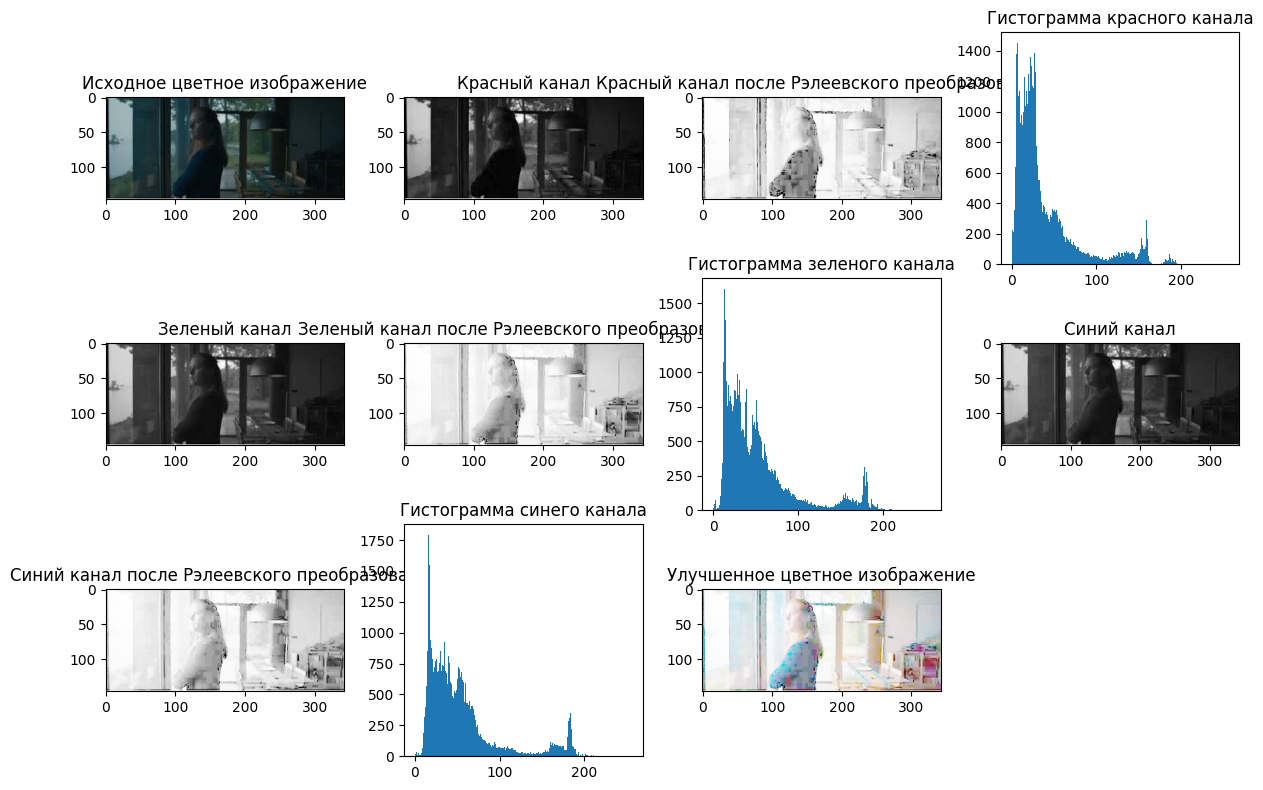

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Чтение низкоконтрастного цветного изображения
I = cv2.imread('photo.jpeg')

# Получение размеров изображения
numRows, numCols, _ = I.shape

# Извлечение отдельных каналов RGB
I_red = I[:, :, 2]  # OpenCV использует формат BGR по умолчанию
I_green = I[:, :, 1]
I_blue = I[:, :, 0]

# Функция для выравнивания гистограммы
def histogram_equalization(I_channel):
    hist_counts = cv2.calcHist([I_channel], [0], None, [256], [0, 256])
    cdf = hist_counts.cumsum() / hist_counts.sum()
    cdf_min = cdf[cdf > 0].min()  # Нахождение минимального ненулевого значения CDF
    I_eq = ((cdf[I_channel] - cdf_min) / (1 - cdf_min) * 255).astype(np.uint8)
    return I_eq

# Применение выравнивания гистограммы к каждому каналу
I_red_eq = histogram_equalization(I_red)
I_green_eq = histogram_equalization(I_green)
I_blue_eq = histogram_equalization(I_blue)

# Функция для Рэлеевского преобразования
def rayleigh_transform(I_eq):
    c = 255 / np.log(1 + 255)  # Установка коэффициента c
    I_out = c * np.log(1 + I_eq.astype(np.float32))  # Применение Рэлеевского преобразования
    return np.clip(I_out, 0, 255).astype(np.uint8)  # Приведение к диапазону [0, 255]

# Применение Рэлеевского преобразования к каждому каналу
I_red_stretch = rayleigh_transform(I_red_eq)
I_green_stretch = rayleigh_transform(I_green_eq)
I_blue_stretch = rayleigh_transform(I_blue_eq)

# Объединение обработанных каналов в цветное изображение
I_enhanced = cv2.merge([I_blue_stretch, I_green_stretch, I_red_stretch])

# Визуализация
plt.figure(figsize=(12, 8))

# Исходное изображение
plt.subplot(3, 4, 1), plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB)), plt.title('Исходное цветное изображение')
# Красный канал и его гистограмма
plt.subplot(3, 4, 2), plt.imshow(I_red, cmap='gray'), plt.title('Красный канал')
plt.subplot(3, 4, 3), plt.imshow(I_red_stretch, cmap='gray'), plt.title('Красный канал после Рэлеевского преобразования')
plt.subplot(3, 4, 4), plt.hist(I_red.flatten(), bins=256, range=[0, 256]), plt.title('Гистограмма красного канала')
# Зеленый канал и его гистограмма
plt.subplot(3, 4, 5), plt.imshow(I_green, cmap='gray'), plt.title('Зеленый канал')
plt.subplot(3, 4, 6), plt.imshow(I_green_stretch, cmap='gray'), plt.title('Зеленый канал после Рэлеевского преобразования')
plt.subplot(3, 4, 7), plt.hist(I_green.flatten(), bins=256, range=[0, 256]), plt.title('Гистограмма зеленого канала')
# Синий канал и его гистограмма
plt.subplot(3, 4, 8), plt.imshow(I_blue, cmap='gray'), plt.title('Синий канал')
plt.subplot(3, 4, 9), plt.imshow(I_blue_stretch, cmap='gray'), plt.title('Синий канал после Рэлеевского преобразования')
plt.subplot(3, 4, 10), plt.hist(I_blue.flatten(), bins=256, range=[0, 256]), plt.title('Гистограмма синего канала')
# Улучшенное изображение
plt.subplot(3, 4, 11), plt.imshow(cv2.cvtColor(I_enhanced, cv2.COLOR_BGR2RGB)), plt.title('Улучшенное цветное изображение')

plt.tight_layout()
plt.show()
